[메모]

(210, 164, 74) 플레이어 <br>
(187, 187, 53) 대기 플레이어 <br>
(0, 28, 136) 도로 <br>
(228, 111, 111) 벽 & 과자 <br>
(198, 89, 179) 분홍 유령 <br>
(180, 122, 48) 노랑 유령 <br>
(200, 72, 27) 빨강 유령 <br>
(84, 184, 153) 하늘 유령 <br>
(184, 50, 50) 체리 <br>
(195, 144, 61) 점수<br>

게임 자체에서 유령들이 지맘대로 움직임

In [114]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [115]:
def colored(r, g, b, text):
    return '\033[1m' + "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)

In [116]:
env = gym.make('MsPacman-v0')
state = env.reset()

In [8]:
rgb_images = []
rgb_arrays = []

In [9]:
for _ in range(1000):
    image = env.render(mode='rgb_array')
    observation, reward, done, info = env.step(env.action_space.sample())
    rgb_images.append(image)
    rgb_arrays.append(observation)

In [117]:
rgb_images

[array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[228, 111, 111],
         [228, 111, 111],
         [228, 111, 111],
         ...,
         [228, 111, 111],
         [228, 111, 111],
         [228, 111, 111]],
 
        [[228, 111, 111],
         [228, 111, 111],
         [228, 111, 111],
         ...,
         [228, 111, 111],
         [228, 111, 111],
         [228, 111, 111]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [118]:
info

{'lives': 0, 'episode_frame_number': 1865, 'frame_number': 1865}

In [119]:
len(rgb_images)

1000

In [184]:
rgb = rgb_images[0]

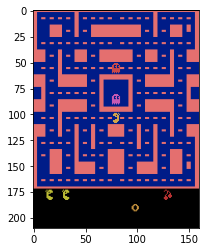

In [185]:
plt.imshow(rgb)

In [168]:
rgb.shape

(210, 160, 3)

In [169]:
color_unique = rgb.reshape((-1,3))

In [170]:
for code in np.unique(color_unique, axis=0):
    r = code[0]
    g = code[1]
    b = code[2]
    
    print(colored(r,g,b, f"{(r,g,b)}  색상"))

(0, 0, 0)  색상 
(0, 28, 136)  색상 
(184, 50, 50)  색상 
(187, 187, 53)  색상 
(195, 144, 61)  색상 
(198, 89, 179)  색상 
(210, 164, 74)  색상 
(228, 111, 111)  색상 


### Data Preprocess

In [171]:
df = pd.DataFrame(rgb.reshape(-1,3), columns=['R', 'G', 'B'])

In [172]:
df['x'] = df.apply(lambda row: (int(int(row.name % 160))), axis=1)
df['y'] = df.apply(lambda row: (int(int(row.name) / 160)), axis=1)
df['pos'] = df.apply(lambda row: (row['x'], row['y']), axis=1)
df['RGB'] = df.apply(lambda row: (row['R'], row['G'], row['B']), axis=1)

In [173]:
# 전처리 time 행 열 R G B

In [174]:
df

,R,G,B,x,y,pos,RGB
0,0,0,0,0,0,"(0, 0)","(0, 0, 0)"
1,0,0,0,1,0,"(1, 0)","(0, 0, 0)"
2,0,0,0,2,0,"(2, 0)","(0, 0, 0)"
3,0,0,0,3,0,"(3, 0)","(0, 0, 0)"
4,0,0,0,4,0,"(4, 0)","(0, 0, 0)"
...,...,...,...,...,...,...,...
33595,0,0,0,155,209,"(155, 209)","(0, 0, 0)"
33596,0,0,0,156,209,"(156, 209)","(0, 0, 0)"
33597,0,0,0,157,209,"(157, 209)","(0, 0, 0)"
33598,0,0,0,158,209,"(158, 209)","(0, 0, 0)"


<AxesSubplot:xlabel='RGB', ylabel='count'>

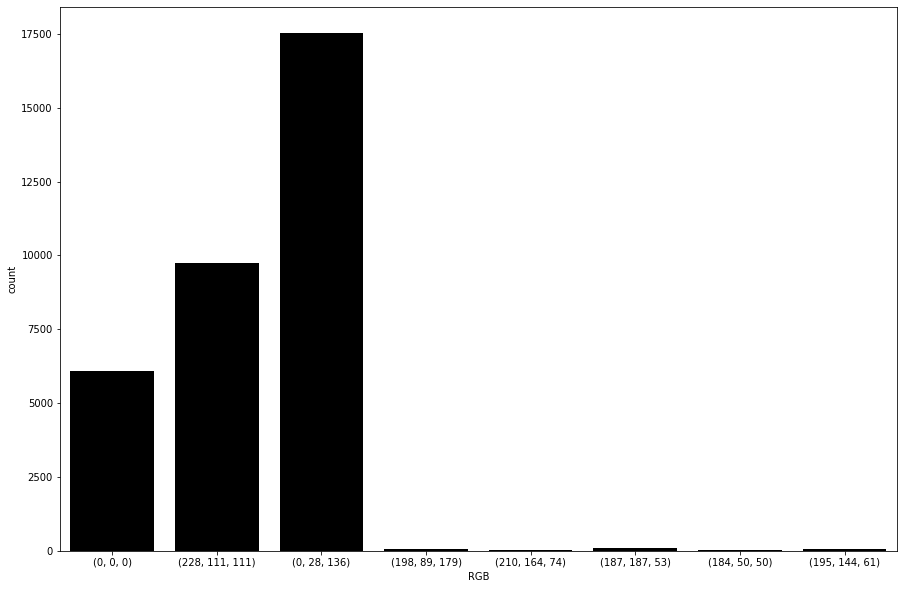

In [175]:
plt.figure(figsize=(15,10))
sns.countplot(x='RGB', data=df, color='black')

### Black

In [176]:
black = df[df['RGB'] == (0,0,0)]

In [177]:
black['y'].unique()

array([  0, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209],
      dtype=int64)

In [178]:
black[(black.y > 0) & (black.y < 172)]['x'].unique()

array([], dtype=int64)

black은 y가 0, 172 이상인 경우 존재

### Ghost 

#### Sky Blue Ghost

In [179]:
sky_blue_ghost = df[df['RGB'] == (84, 184, 153)]
sky_blue_ghost.head()

,R,G,B,x,y,pos,RGB


In [180]:
print(f"X => {sky_blue_ghost['x'].min()} ~ {sky_blue_ghost['x'].max()}")
print(f"Y => {sky_blue_ghost['y'].min()} ~ {sky_blue_ghost['y'].max()}")

X => nan ~ nan
Y => nan ~ nan


size 8 X 10

#### PINK

In [181]:
pink_ghost = df[df['RGB'] == (198, 89, 179)]
pink_ghost.head()

,R,G,B,x,y,pos,RGB
10802,198,89,179,82,67,"(82, 67)","(198, 89, 179)"
10803,198,89,179,83,67,"(83, 67)","(198, 89, 179)"
10804,198,89,179,84,67,"(84, 67)","(198, 89, 179)"
10805,198,89,179,85,67,"(85, 67)","(198, 89, 179)"
10961,198,89,179,81,68,"(81, 68)","(198, 89, 179)"


In [182]:
print(f"X => {pink_ghost['x'].min()} ~ {pink_ghost['x'].max()}")
print(f"Y => {pink_ghost['y'].min()} ~ {pink_ghost['y'].max()}")

X => 80 ~ 87
Y => 67 ~ 76


size 8 X 10

유령에 대해 정중앙 위치를 할 필요는 없을 것 같음 거리를 구하는 것도 아니기 때문에 위치는 하나의 상태 값
으로만 사용할 것이기 때문이다.

In [6]:
env = gym.make('MsPacman-v0')
state = env.reset()

count = 0;

while True:
    env.render()
    observation, reward, done, info = env.step(env.action_space.sample())
    print(count, info)
    count += 1
    import time
    time.sleep(0.1)

0 {'lives': 3, 'episode_frame_number': 3, 'frame_number': 3}
1 {'lives': 3, 'episode_frame_number': 6, 'frame_number': 6}
2 {'lives': 3, 'episode_frame_number': 9, 'frame_number': 9}
3 {'lives': 3, 'episode_frame_number': 11, 'frame_number': 11}
4 {'lives': 3, 'episode_frame_number': 13, 'frame_number': 13}
5 {'lives': 3, 'episode_frame_number': 17, 'frame_number': 17}
6 {'lives': 3, 'episode_frame_number': 20, 'frame_number': 20}
7 {'lives': 3, 'episode_frame_number': 23, 'frame_number': 23}
8 {'lives': 3, 'episode_frame_number': 26, 'frame_number': 26}
9 {'lives': 3, 'episode_frame_number': 29, 'frame_number': 29}
10 {'lives': 3, 'episode_frame_number': 32, 'frame_number': 32}
11 {'lives': 3, 'episode_frame_number': 34, 'frame_number': 34}
12 {'lives': 3, 'episode_frame_number': 37, 'frame_number': 37}
13 {'lives': 3, 'episode_frame_number': 41, 'frame_number': 41}
14 {'lives': 3, 'episode_frame_number': 45, 'frame_number': 45}
15 {'lives': 3, 'episode_frame_number': 49, 'frame_numbe

126 {'lives': 3, 'episode_frame_number': 379, 'frame_number': 379}
127 {'lives': 3, 'episode_frame_number': 382, 'frame_number': 382}
128 {'lives': 3, 'episode_frame_number': 386, 'frame_number': 386}
129 {'lives': 3, 'episode_frame_number': 390, 'frame_number': 390}
130 {'lives': 3, 'episode_frame_number': 394, 'frame_number': 394}
131 {'lives': 3, 'episode_frame_number': 396, 'frame_number': 396}
132 {'lives': 3, 'episode_frame_number': 400, 'frame_number': 400}
133 {'lives': 3, 'episode_frame_number': 402, 'frame_number': 402}
134 {'lives': 3, 'episode_frame_number': 405, 'frame_number': 405}
135 {'lives': 3, 'episode_frame_number': 409, 'frame_number': 409}
136 {'lives': 3, 'episode_frame_number': 413, 'frame_number': 413}
137 {'lives': 3, 'episode_frame_number': 415, 'frame_number': 415}
138 {'lives': 3, 'episode_frame_number': 419, 'frame_number': 419}
139 {'lives': 3, 'episode_frame_number': 421, 'frame_number': 421}
140 {'lives': 3, 'episode_frame_number': 425, 'frame_number': 

250 {'lives': 2, 'episode_frame_number': 758, 'frame_number': 758}
251 {'lives': 2, 'episode_frame_number': 760, 'frame_number': 760}
252 {'lives': 2, 'episode_frame_number': 763, 'frame_number': 763}
253 {'lives': 2, 'episode_frame_number': 765, 'frame_number': 765}
254 {'lives': 2, 'episode_frame_number': 769, 'frame_number': 769}
255 {'lives': 2, 'episode_frame_number': 771, 'frame_number': 771}
256 {'lives': 2, 'episode_frame_number': 774, 'frame_number': 774}
257 {'lives': 2, 'episode_frame_number': 778, 'frame_number': 778}
258 {'lives': 2, 'episode_frame_number': 780, 'frame_number': 780}
259 {'lives': 2, 'episode_frame_number': 783, 'frame_number': 783}
260 {'lives': 2, 'episode_frame_number': 787, 'frame_number': 787}
261 {'lives': 2, 'episode_frame_number': 789, 'frame_number': 789}
262 {'lives': 2, 'episode_frame_number': 793, 'frame_number': 793}
263 {'lives': 2, 'episode_frame_number': 797, 'frame_number': 797}
264 {'lives': 2, 'episode_frame_number': 800, 'frame_number': 

372 {'lives': 1, 'episode_frame_number': 1121, 'frame_number': 1121}
373 {'lives': 1, 'episode_frame_number': 1125, 'frame_number': 1125}
374 {'lives': 1, 'episode_frame_number': 1129, 'frame_number': 1129}
375 {'lives': 1, 'episode_frame_number': 1132, 'frame_number': 1132}
376 {'lives': 1, 'episode_frame_number': 1135, 'frame_number': 1135}
377 {'lives': 1, 'episode_frame_number': 1139, 'frame_number': 1139}
378 {'lives': 1, 'episode_frame_number': 1143, 'frame_number': 1143}
379 {'lives': 1, 'episode_frame_number': 1146, 'frame_number': 1146}
380 {'lives': 1, 'episode_frame_number': 1150, 'frame_number': 1150}
381 {'lives': 1, 'episode_frame_number': 1152, 'frame_number': 1152}
382 {'lives': 1, 'episode_frame_number': 1156, 'frame_number': 1156}
383 {'lives': 1, 'episode_frame_number': 1158, 'frame_number': 1158}
384 {'lives': 1, 'episode_frame_number': 1162, 'frame_number': 1162}
385 {'lives': 1, 'episode_frame_number': 1166, 'frame_number': 1166}
386 {'lives': 1, 'episode_frame_nu

492 {'lives': 1, 'episode_frame_number': 1485, 'frame_number': 1485}
493 {'lives': 1, 'episode_frame_number': 1487, 'frame_number': 1487}
494 {'lives': 1, 'episode_frame_number': 1490, 'frame_number': 1490}
495 {'lives': 1, 'episode_frame_number': 1494, 'frame_number': 1494}
496 {'lives': 1, 'episode_frame_number': 1496, 'frame_number': 1496}
497 {'lives': 1, 'episode_frame_number': 1499, 'frame_number': 1499}
498 {'lives': 1, 'episode_frame_number': 1503, 'frame_number': 1503}
499 {'lives': 1, 'episode_frame_number': 1506, 'frame_number': 1506}
500 {'lives': 1, 'episode_frame_number': 1508, 'frame_number': 1508}
501 {'lives': 1, 'episode_frame_number': 1511, 'frame_number': 1511}
502 {'lives': 1, 'episode_frame_number': 1514, 'frame_number': 1514}
503 {'lives': 1, 'episode_frame_number': 1518, 'frame_number': 1518}
504 {'lives': 1, 'episode_frame_number': 1520, 'frame_number': 1520}
505 {'lives': 1, 'episode_frame_number': 1524, 'frame_number': 1524}
506 {'lives': 1, 'episode_frame_nu

612 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
613 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
614 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
615 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
616 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
617 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
618 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
619 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
620 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
621 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
622 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
623 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
624 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
625 {'lives': 0, 'episode_frame_number': 1649, 'frame_number': 1649}
626 {'lives': 0, 'episode_frame_nu

KeyboardInterrupt: 

유령의 위치뿐만 아니라 방향도??
이유는 유령이 꼭 플레이어와 닿을 수 있는 방향으론 움직이지 않기 때문
방향까진 무리고 위치만으로도 충분할 듯 한데

아이템을 제외하고 컬러수를 매긴다.

과자 포지션은 알고 있는게 좋음

전처리를 하는 이유는 디버깅을 좀 쉽게 할려는 이유도 있음 왜냐면 배열 형태론 사람이 못 알아보니깐
또 커스텀마이징도 가능함